<a href="https://colab.research.google.com/github/KishorKaphle/ML-Python-projects-and-book-readings/blob/main/Getting_Started_with_MD_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib
# import matplotlib.pyplot as plt


Using matplotlib backend: agg


In [ ]:
!wget -O mini.sh https://repo.anaconda.com/miniconda/Miniconda3-4.6.14-Linux-x86_64.sh
!bash ./mini.sh -b -f -p /usr/local
!conda install -q -y --prefix /usr/local -c conda-forge mdanalysis
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2021-04-03 21:44:10--  https://repo.anaconda.com/miniconda/Miniconda3-4.6.14-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70348401 (67M) [application/x-sh]
Saving to: ‘mini.sh’

mini.sh             100%[===================>]  67.09M   217MB/s    in 0.3s    

2021-04-03 21:44:10 (217 MB/s) - ‘mini.sh’ saved [70348401/70348401]

PREFIX=/usr/local
reinstalling: python-3.7.3-h0371630_0 ...
using -f (force) option
Python 3.7.3
reinstalling: ca-certificates-2019.1.23-0 ...
using -f (force) option
reinstalling: libgcc-ng-8.2.0-hdf63c60_1 ...
using -f (force) option
reinstalling: libstdcxx-ng-8.2.0-hdf63c60_1 ...
using -f (force) option
reinstalling: libffi-3.2.1-hd88cf55_4 ...
using -f (force) option
reinstalling: ncurses-6.1-he6710b0_1 ...
using -f (force) option
reinstalling: o

In [ ]:
!conda install -c conda-forge MDAnalysisTests


InvalidVersionSpec: Invalid version '4.19.112+': empty version component



In [ ]:
!pip install --upgrade MDAnalysis


Requirement already up-to-date: MDAnalysis in /usr/local/lib/python3.7/site-packages (1.0.1)
    100% |████████████████████████████████| 2.0MB 16.0MB/s 


In [ ]:
import MDAnalysis as mda
from MDAnalysis.tests.datafiles import PSF, DCD
print(mda.Universe(PSF, DCD))
print(mda.__version__)

*** ERROR ***
In order to run the MDAnalysis test cases you must install the
MDAnalysisTestData package (which has been separated from the 
library code itself since release 0.7.4). Go to 

     http://pypi.python.org/pypi/MDAnalysisTests

and download and install the `MDAnalysisTests-x.y.z.tar.gz'
that matches your MDAnalysis release.


ImportError: ignored

In [ ]:
u = mda.Universe('S10_UW2M_dyn.dcd', 'S10_UW2M.pdb')


In [ ]:
print(u.atoms)

<AtomGroup [<Atom 1:>, <Atom 2:>, <Atom 3:>, ..., <Atom 95627:>, <Atom 95628:>, <Atom 95629:>]>


In [ ]:
chains = u.atoms.fragments
from MDAnalysis.analysis import polymer

NoDataError: ignored

/usr/local/lib/python3.7/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


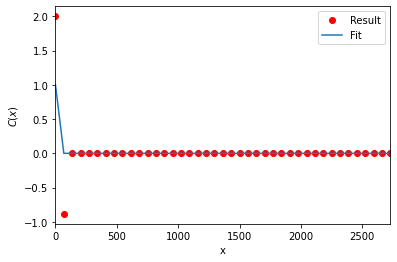

In [ ]:
pmeeecl = u.select_atoms('name C1 C2 H1 O1 O2')
PL = polymer.PersistenceLength([pmeeecl])
PL.run()
print(PL.run())
PL.plot()

In [ ]:
    #select only the backbone atoms for each chain

backbones = [chain.select_atoms('name C1 C2 H1 O1 O2') for chain in chains]

#sort the chains, removing any non-backbone atoms
sorted_backbones = [polymer.sort_backbone(bb) for bb in backbones]
persistence_length = polymer.PersistenceLength(sorted_backbones)
#run the analysis. this will average over all polymer chains
# and all timesteps in trajectory
persistence_length = persistence_length.run()
print('The peristence length is: {}', format(persistence_length.lp))
#always check the visualisation of this:
persistence_length.plot()

NameError: ignored

In [ ]:
print(u.trajectory)

<DCDReader S10_UW2M_dyn.dcd with 71 frames of 95629 atoms>


In [ ]:
position_array = u.atoms.positions

In [ ]:
position_array

array([[  8.891947 ,   8.924202 , -16.9995   ],
       [  4.8642197,  16.185913 , -17.039589 ],
       [  5.673434 ,  17.140387 , -16.094648 ],
       ...,
       [ -6.677904 , -10.573724 ,  34.889236 ],
       [ -5.7784038, -10.801097 ,  34.606216 ],
       [ -6.997527 , -11.239549 ,  35.51806  ]], dtype=float32)

In [ ]:
position_array.shape

(95629, 3)

In [ ]:
position_array[1]

array([  4.8642197,  16.185913 , -17.039589 ], dtype=float32)

In [ ]:
position_array[0][0]

8.891947

In [ ]:
position_array[95628][2]

35.51806

In [ ]:
 x = []
 y = []
 z = []
 for i in range(95629):
   x.append(position_array[i][0])
   y.append(position_array[i][1])
   z.append(position_array[i][2])



In [ ]:
print(z)

[-16.9995, -17.039589, -16.094648, -16.668972, -16.259487, -17.11903, -17.057854, -16.84656, -17.380007, -18.37083, -17.010214, -16.900301, -17.009443, -16.029402, -15.978421, -15.007077, -14.85066, -14.219098, -13.786059, -14.69345, -14.081045, -14.910589, -14.2370615, -13.810843, -13.179915, -12.405707, -11.745084, -12.397112, -12.435353, -13.54772, -13.831727, -14.91343, -16.187641, -17.171112, -18.303894, -17.974636, -19.214819, -18.967735, -20.25715, -20.132368, -21.087328, -20.95283, -19.835432, -18.951488, -17.804554, -17.277163, -17.744246, -17.197107, -17.455822, -16.442375, -16.523613, -15.722717, -15.551365, -14.8382225, -14.606958, -13.812763, -14.270046, -13.565346, -14.057162, -13.253478, -13.819486, -13.247107, -12.507523, -12.968263, -12.089521, -11.309305, -10.711794, -9.656579, -9.10099, -7.941099, -6.747667, -6.5542727, -7.4753094, -7.643565, -8.374992, -7.8590007, -6.896669, -6.50316, -5.7361684, -3.0211048, -4.488302, -4.515461, -3.4975114, -3.7640352, -2.7360806, 

3D scatter plotting of positions of solvent atoms


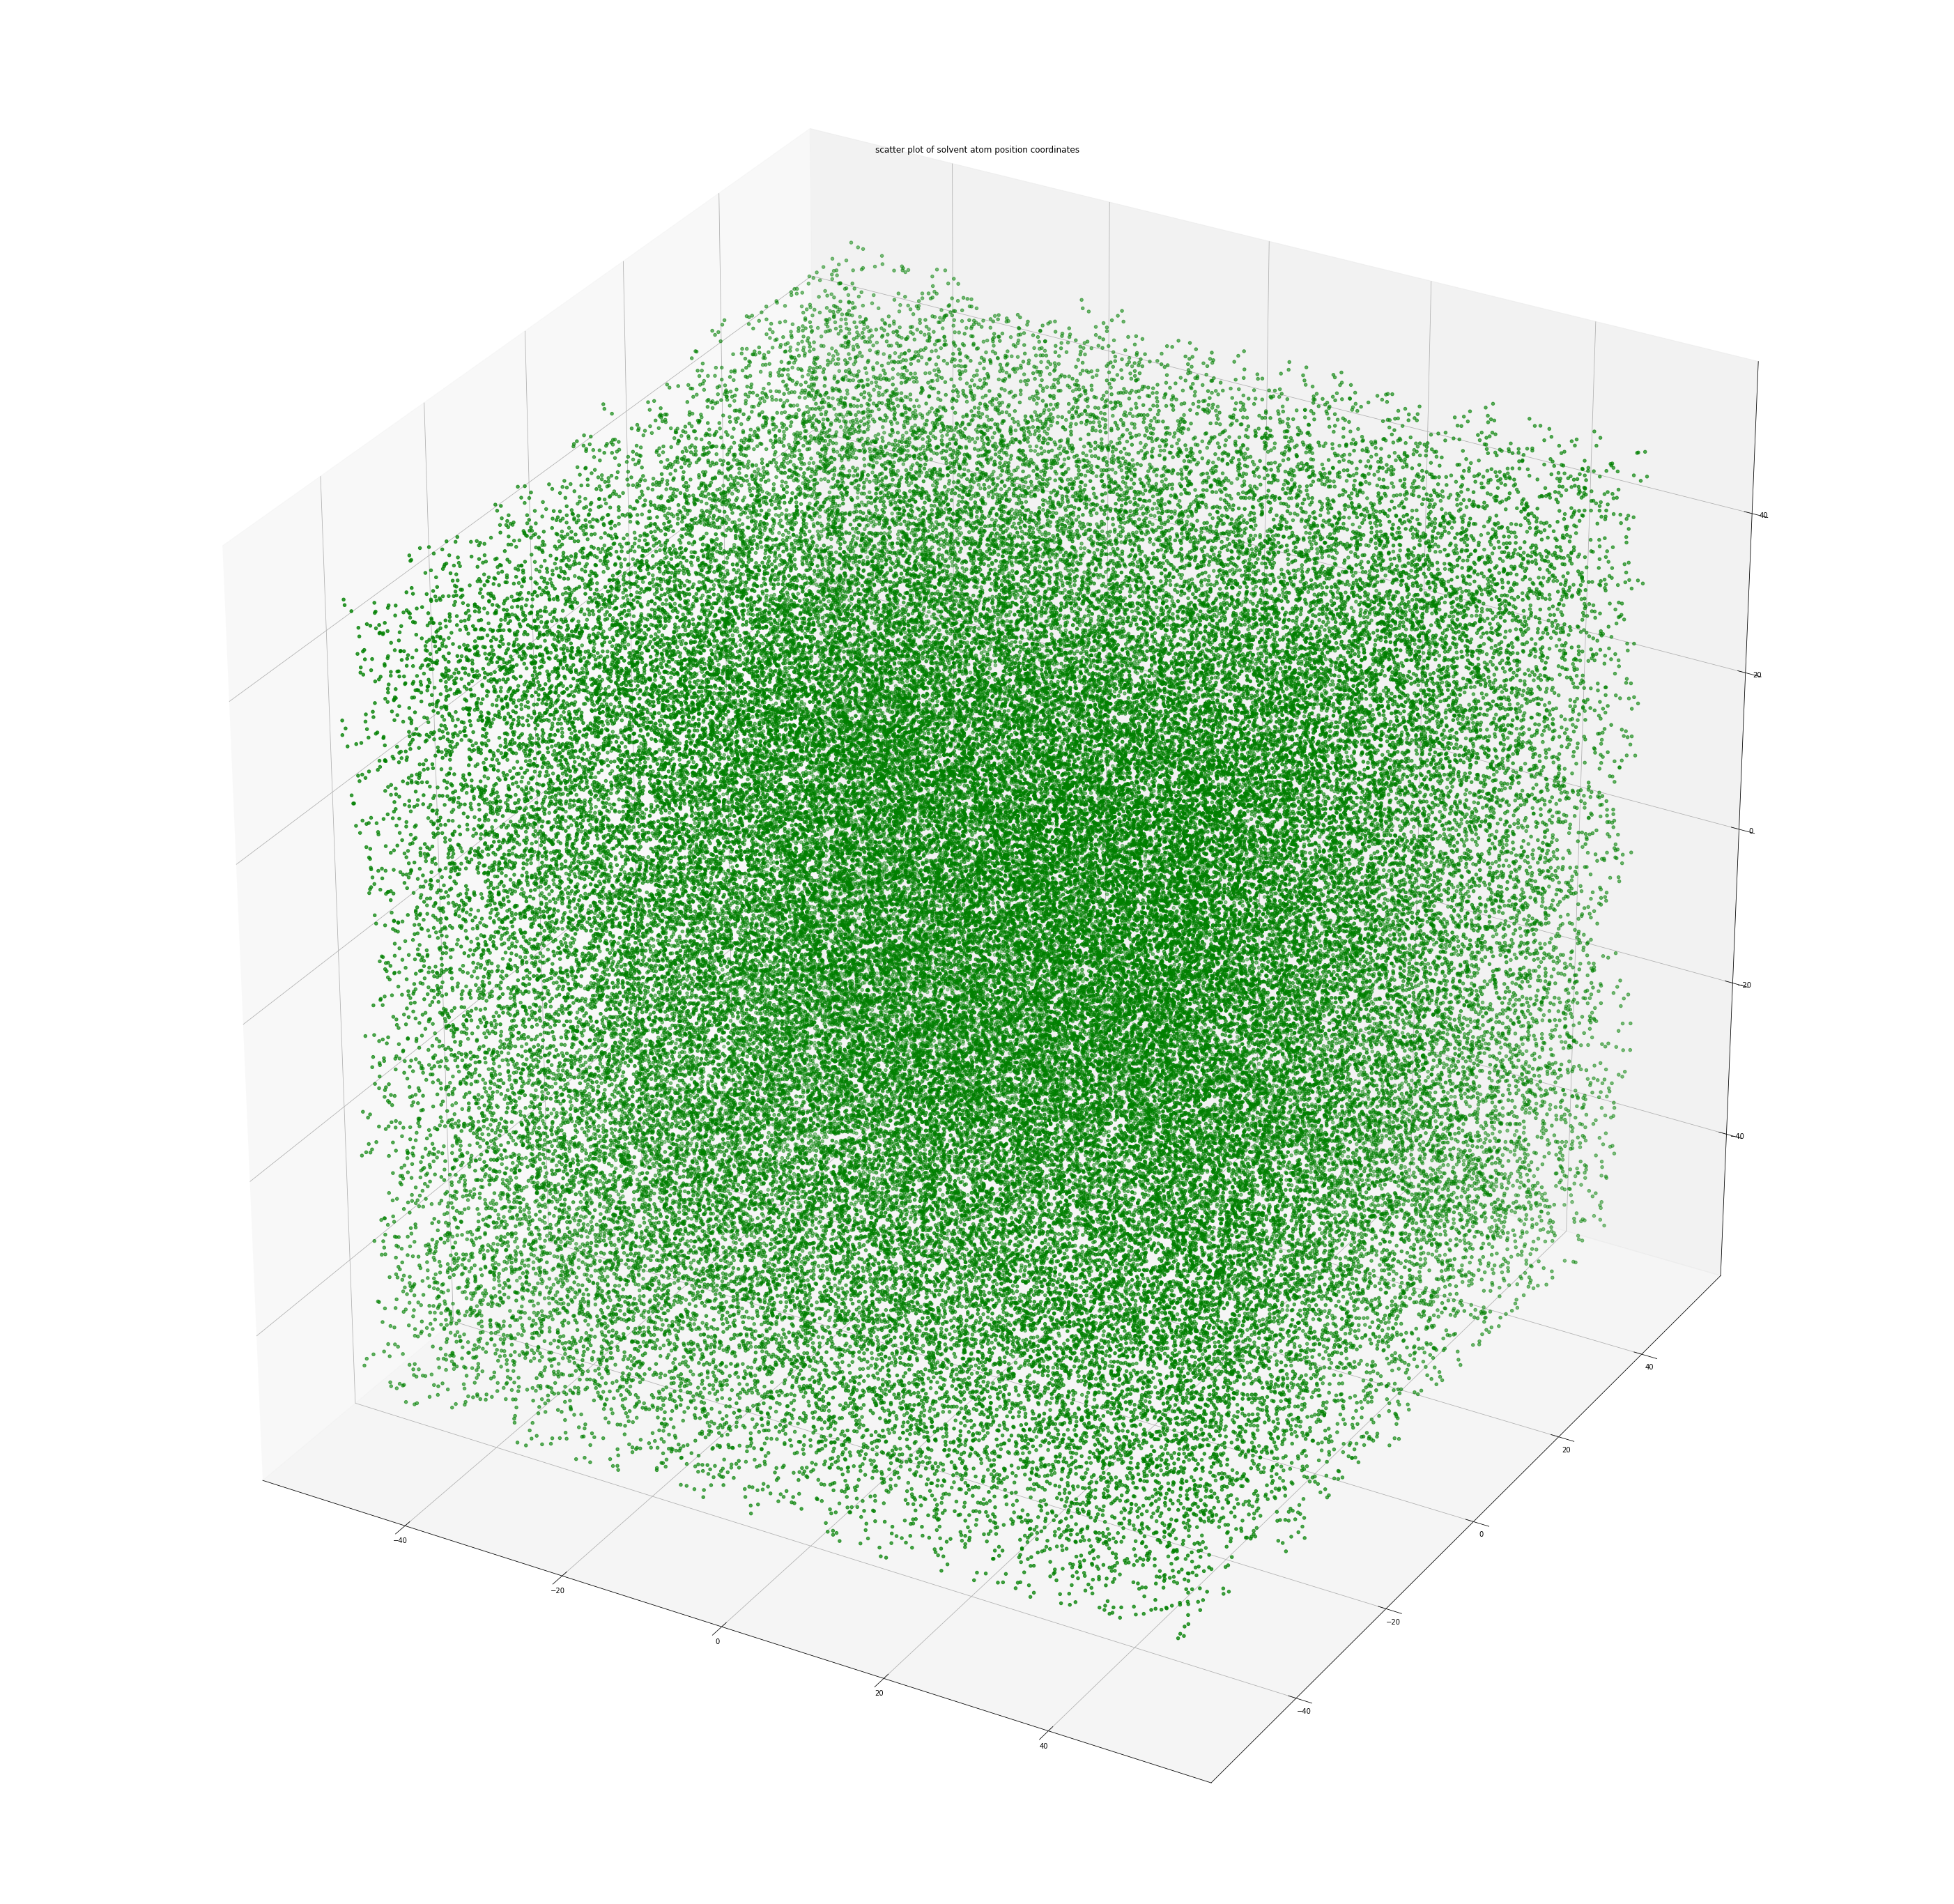

In [ ]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

#creating figure
fig = plt.figure(figsize= (50, 50))
ax = plt.axes(projection = '3d')

#creating plot
ax.scatter3D(x, y, z, color = 'green')
plt.title('scatter plot of solvent atom position coordinates')
plt.show()

In [ ]:
!conda remove nglview

In [ ]:
!conda install -c conda-forge nglview

Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - nglview


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    argon2-cffi-20.1.0         |   py37h5e8e339_2          47 KB  conda-forge
    async_generator-1.10       |             py_0          18 KB  conda-forge
    backcall-0.2.0             |     pyh9f0ad1d_0          13 KB  conda-forge
    backports-1.0              |             py_2           4 KB  conda-forge
    backports.functools_lru_cache-1.6.1|             py_0           8 KB  conda-forge
    bleach-3.3.0               |     pyh44b312d_0         111 KB  conda-forge
    defusedxml-0.7.1           |     pyhd8ed1ab_0          23 KB  conda-forge
    entrypoints-0.3       

In [ ]:
!pip install --upgrade nglview

Requirement already up-to-date: nglview in /usr/local/lib/python3.7/site-packages (2.7.7)


In [ ]:
import nglview as nv
import numpy as np
from IPython.core.display import Image


sol_view = nv.show_mdanalysis(u)
# sol_view.center()
sol_view

plt.show()

In [ ]:
import MDAnalysis as mda
import nglview as nv
from nglview.datafiles import PDB, XTC
from MDAnalysis.tests.datafiles import PDB_small

protein = mda.Universe(PDB_small)
nv.show_mdanalysis(protein)


/usr/local/lib/python3.7/site-packages/MDAnalysis/topology/PDBParser.py:330: UserWarning: Element information is absent or missing for a few atoms. Elements attributes will not be populated.
  warnings.warn("Element information is absent or missing for a few "


NGLWidget()

**Centering a trajectory in the box**

In [ ]:
import MDAnalysis as mda
from MDAnalysis.tests.datafiles import TPR, XTC
import numpy as np
import nglview as nv


Loading files

In [ ]:
u = mda.Universe(TPR, XTC, in_memory=True)


In [ ]:
view = nv.show_mdanalysis(u)
view.add_representation('point', 'resname SOL')
view.center()

TypeError: ignored

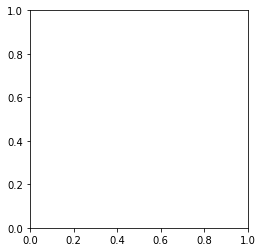

In [ ]:
view
plt.imshow(view)
# plt.imsave('/content/sample_data', view)

In [ ]:
import MDAnalysis as mda
from MDAnalysis.analysis import align
from MDAnalysis.tests.datafiles import CRD, PSF, DCD, DCD2
import nglview as nv

In [ ]:
adk_open = mda.Universe(CRD, DCD2)
nv.show_mdanalysis(adk_open)

NGLWidget(max_frame=101)

In [ ]:
!conda install nglview -c conda-forge
# might need: jupyter-nbextension enable nglview --py --sys-prefix

# if you already installed nglview, you can `upgrade`
!conda upgrade nglview --force
# might need: jupyter-nbextension enable nglview --py --sys-prefix


Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done

# All requested packages already installed.



         See 'conda update --help' for details about the --force-reinstall
         and --clobber flags.


Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - nglview


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    argon2-cffi-20.1.0         |   py37h27cfd23_1          46 KB
    async_generator-1.10       |   py37h28b3542_0          39 KB
    attrs-20.3.0               |     pyhd3eb1b0_0          43 KB
    backcall-0.2.0             |     pyhd3eb1b0_0          13 KB
    bleach-3.3.0               |     pyhd3eb1b0_0         113 KB
    br

In [ ]:
import nglview
view = nglview.show_pdbid("3pqr")  # load "3pqr" from RCSB PDB and display viewer widget
view
%matplotlib inline

ModuleNotFoundError: ignored

In [ ]:
import MDAnalysis as mda
from MDAnalysis.analysis import align
from MDAnalysis.tests.datafiles import CRD, PSF, DCD, DCD2
import nglview as nv

In [ ]:
adk_open = mda.Universe(CRD, DCD2)
nv.show_mdanalysis(adk_open)
%matplotlib inline


In [ ]:
adk_closed = mda.Universe(PSF, DCD)
nv.show_mdanalysis(adk_closed.atoms)

NGLWidget(max_frame=97)

In [ ]:
import MDAnalysis as mda
from MDAnalysis.tests.datafiles import PSF, DCD, CRD
from MDAnalysis.analysis import rms

import pandas as pd
# the next line is necessary to display plots in Jupyter
%matplotlib inline

**Determining the persistence length of a polymer**

In [ ]:
import MDAnalysis as mda
from MDAnalysis.tests.datafiles import TRZ_psf, TRZ
from MDAnalysis.analysis import polymer
%matplotlib inline


*** ERROR ***
In order to run the MDAnalysis test cases you must install the
MDAnalysisTestData package (which has been separated from the 
library code itself since release 0.7.4). Go to 

     http://pypi.python.org/pypi/MDAnalysisTests

and download and install the `MDAnalysisTests-x.y.z.tar.gz'
that matches your MDAnalysis release.


ImportError: ignored

In [ ]:

u = mda.Universe('S10_UW2M.psf')
backbones = [ch.select_atoms('not name O* H*') for ch in chains]

for i in backbones:
  print(i)

/usr/local/lib/python3.7/site-packages/MDAnalysis/core/universe.py:173: UserWarning: No coordinate reader found for S10_UW2M.psf. Skipping this file.
  'this file.'.format(filename))


NameError: ignored

In [ ]:
# loading files
u = mda.Universe('S10_UW2M.psf')

#choosing the chains and backbone atoms
chains = u.atoms.fragments

polymer = [ch.select_atoms('O*') for ch in chains]
for ch in chains:
  print(ch)

/usr/local/lib/python3.7/site-packages/MDAnalysis/core/universe.py:173: UserWarning: No coordinate reader found for S10_UW2M.psf. Skipping this file.
  'this file.'.format(filename))
/usr/local/lib/python3.7/site-packages/MDAnalysis/core/topologyattrs.py:2261: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  np.array(sorted(unique_bonds)), 4)


SelectionError: ignored

In [ ]:
from MDAnalysis.analysis import polymer

# loading files
u = mda.Universe('S10_UW2M.psf')
Polymer = u.atoms.select_atoms('not name OW')


#choosing the chains and backbone atoms
chains = Polymer.fragments

# for ch in chains:
#   print (chains)



backbones = [ch.select_atoms('name C' or ('name C' and 'name O' and 'name C')) for ch in chains]
print(backbones)



sorted_bb = [polymer.sort_backbone(bb) for bb in backbones]
plen = polymer.PersistenceLength(sorted_bb)
plen.run()
print(plen.results.shape)
print('The persistence length is {}'.format(plen.lp))
plen.plot()

ModuleNotFoundError: ignored

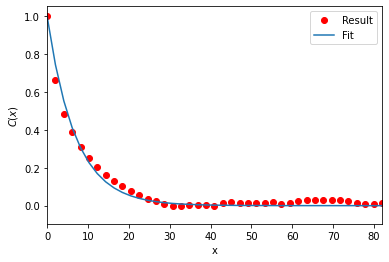

In [ ]:
plen.plot()